<a href="https://colab.research.google.com/github/cuongle2002/AI-/blob/main/AI_WEEK_11_CIFAR10(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
 y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
x_train = x_train.astype('float32')/255   # chuyen thanh kieu thuc tu 0 den 1
x_test = x_test.astype('float32')/255
y_train = y_train.astype('float32')/255
y_test = y_test.astype('float32')/255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
from keras.utils import to_categorical        # categorical chuyen 1 bit thanh n bits 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10) 
y_train.shape 

(50000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(32,32,3),padding='Same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='linear',padding ='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lan tich chap
model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation = 'linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=64,epochs = 20,verbose = 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                      

In [ ]:
model.save("CIFAR10CNN.h5")

ValueError: ignored

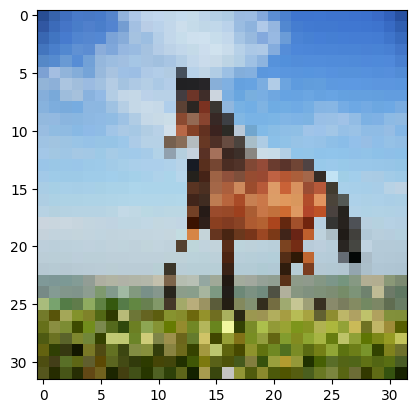

In [ ]:
import matplotlib.pyplot as plt 
from keras.utils.image_utils import img_to_array
from keras.models import Sequential, load_model
from keras.utils import load_img
import numpy as np 


img = load_img('/content/anh-con-ngua.jpg',target_size = (32,32,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
model = load_model('/content/drive/MyDrive/CIFAR10CNN.h5')
np.argmax(model.predict(img), axis = -1)
